Loading and importing files

In [8]:
import numpy as np
import matplotlib.pyplot as plt

majority_data = np.load('class1_data.npy')  
minority_data = np.load('class2_data.npy')  

Mathematical idea about number of points 

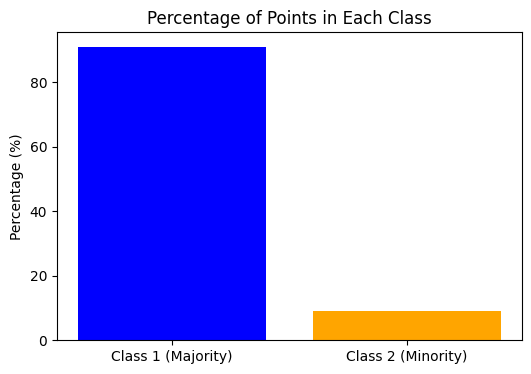

In [9]:
total_points = majority_data.shape[0] + minority_data.shape[0]

majority_percentage = (majority_data.shape[0] / total_points) * 100
minority_percentage = (minority_data.shape[0] / total_points) * 100

plt.figure(figsize=(6, 4))
plt.bar(['Class 1 (Majority)', 'Class 2 (Minority)'], [majority_percentage, minority_percentage], color=['blue', 'orange'])
plt.title("Percentage of Points in Each Class")
plt.ylabel("Percentage (%)")
plt.show()

Visulaizing idea for data distribution

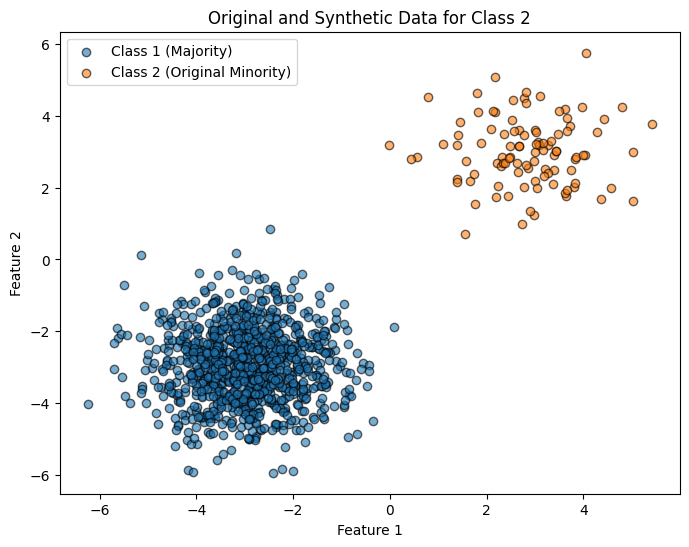

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(majority_data[:, 0], majority_data[:, 1], label='Class 1 (Majority)', alpha=0.6, edgecolor='k')
plt.scatter(minority_data[:, 0], minority_data[:, 1], label='Class 2 (Original Minority)', alpha=0.6, edgecolor='k')
plt.title("Original and Synthetic Data for Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Finding neighbours 

In [11]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def finding_k_nearest_neighbors(minority_data, k):
    neighbors = []
    for i, point in enumerate(minority_data):
        distances = []
        for j, other_point in enumerate(minority_data):
            if i != j:
                distances.append((j, distance(point, other_point)))
        distances.sort(key=lambda x: x[1])  
        nearest_neighbors = [index for index, _ in distances[:k]]  
        neighbors.append(nearest_neighbors)
    return neighbors

Synthetic points 

In [12]:
def generate_synthetic_samples(minority_data, neighbors, num_samples):
    synthetic_samples = []
    n_minority = len(minority_data)

    for _ in range(num_samples):
        random_index = np.random.randint(0, n_minority)
        minority_sample = minority_data[random_index]

        neighbor_index = np.random.choice(neighbors[random_index])
        neighbor_sample = minority_data[neighbor_index]

        a = np.random.rand()  
        synthetic_sample = minority_sample + a * (neighbor_sample - minority_sample)

        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)

Merging data sets

In [16]:
k = 10
n_synthetic_samples = len(majority_data) - len(minority_data)  

neighbors = finding_k_nearest_neighbors(minority_data, k)

synthetic_samples = generate_synthetic_samples(minority_data, neighbors, n_synthetic_samples)

X_resampled = np.vstack((majority_data, minority_data, synthetic_samples))
y_resampled = np.hstack((np.zeros(len(majority_data)), np.ones(len(minority_data) + len(synthetic_samples))))

# this np.vstack and hstack , correspondingly used 2 merge 2 np arrays vertically nd horizontally respectiveely
print(X_resampled)
print(y_resampled)

[[-2.50328585 -3.1382643 ]
 [-2.35231146 -1.47697014]
 [-3.23415337 -3.23413696]
 ...
 [ 3.40623397  4.34460573]
 [ 2.34725049  2.0483732 ]
 [ 2.78096939  4.47846099]]
[0. 0. 0. ... 1. 1. 1.]


Final Corrected data

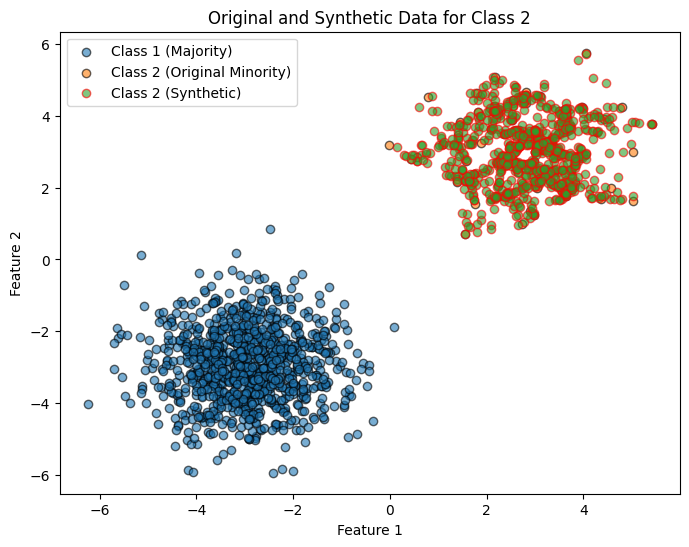

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(majority_data[:, 0], majority_data[:, 1], label='Class 1 (Majority)', alpha=0.6, edgecolor='k')
plt.scatter(minority_data[:, 0], minority_data[:, 1], label='Class 2 (Original Minority)', alpha=0.6, edgecolor='k')
plt.scatter(synthetic_samples[:, 0], synthetic_samples[:, 1], label='Class 2 (Synthetic)', alpha=0.6, edgecolor='r')
plt.title("Original and Synthetic Data for Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()